<a href="https://colab.research.google.com/github/KunalAyush1/PyTorch_learning/blob/main/PyTorch1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

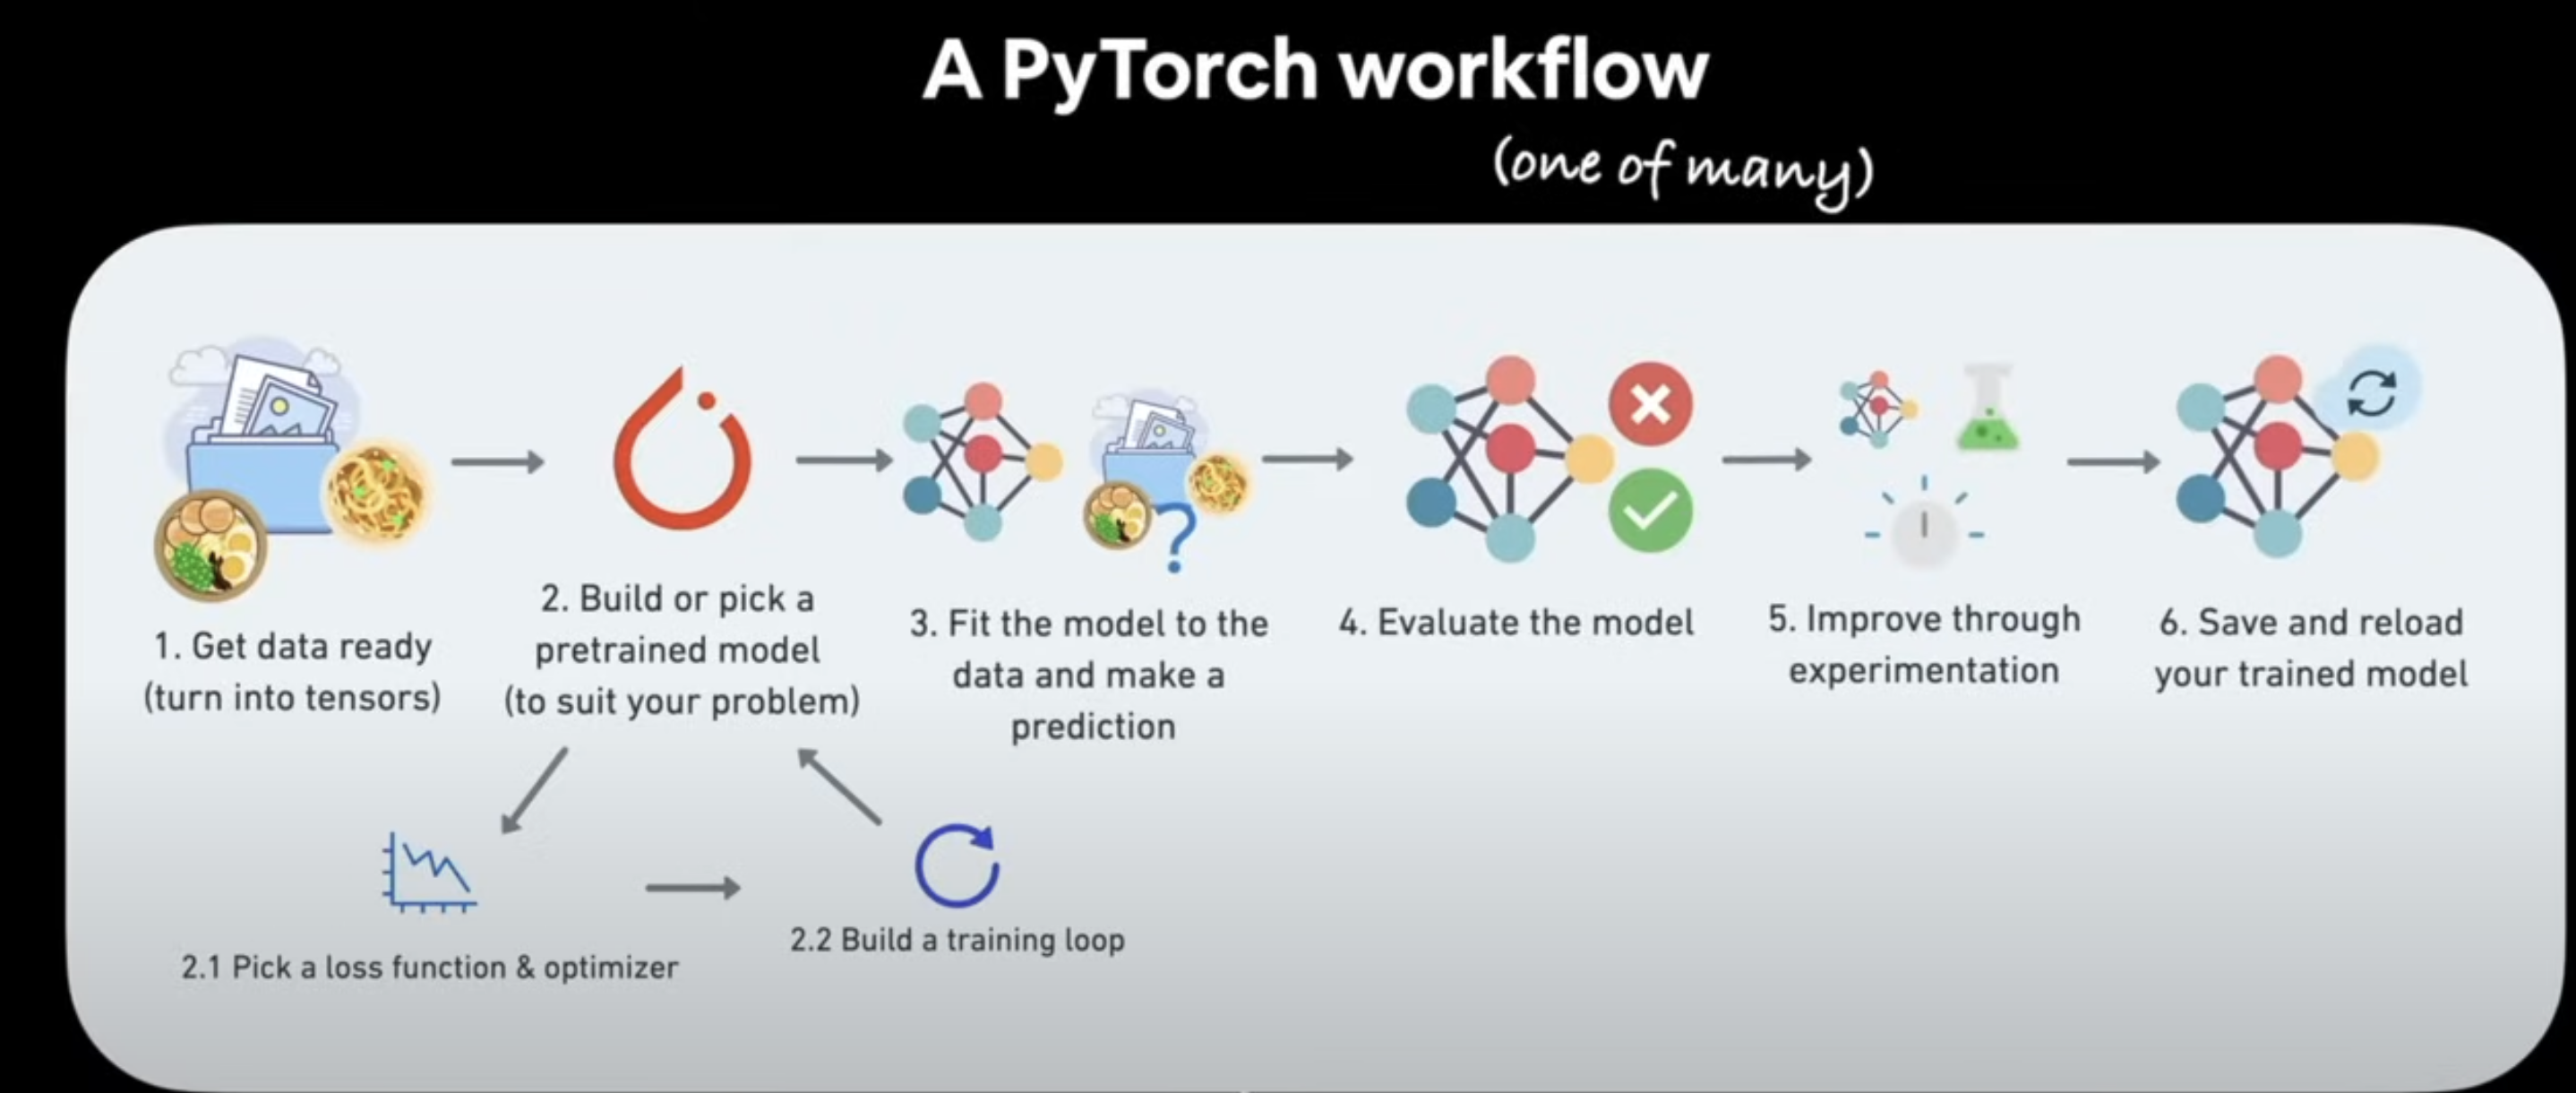

In [20]:
import torch
import numpy as np
from torch import nn
# nn contains all the building blocks for a neural network

#PyTorch Workflow



## 1. Data ( Preparing and Loading)

Data can be almost anything ...In ML such as
* Excel Sheet
* Images
* Videos
* Audio
* DNA
* Text

Machine learning is a game of two parts one is Data we feed and second is the Model we choose

### We will use linear regression formula to make straight line with known parameters

In [21]:
# creating known parameters

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias



In [22]:
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [23]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

In [24]:
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]
len(X_train),len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [25]:
import matplotlib.pyplot as plt

 ### Visualization of data

In [26]:
def plot_predictions(train_data =X_train,train_labels=y_train, test_data=X_test,test_labels=y_test,predictions=None):
  ''''
  Plots training data and test data and compares predictions'''

  plt.figure(figsize=(10,7))
  # plotting training data in blue
  plt.scatter(train_data,train_labels, c='b', s = 4 , label="Training Data")

  # plotting test data in green
  plt.scatter(test_data,test_labels, c='g', s= 4 , label="Test Data")

  if predictions is not None:
    plt.scatter(test_data , predictions , c='r', s= 4, label='Predictions')

  plt.legend(prop={"size": 14});

plt.figure(figsize=(10, 7))
What it does: **Creates a new figure window where the plots will be drawn.**

figsize=(10, 7):** The size of the figure in inches (width=10, height=7). Larger values = bigger plot.**

Useful when you want to create multiple figures or control the layout.

2️⃣ plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")
**Creates a scatter plot (dot-based plot) of the training data.**

train_data → **x-axis**

train_labels → y-axis
**bold text**
c='b' → color = blue (you can also use 'blue')
**bold text**
s=4 → size of each point (small dots). Larger number = bigger dots.

label="Training Data" → used in the legend.

3️⃣ plt.scatter(test_data, test_labels, c='r', s=4, label="Test Data")
Same as above but for test data.

c='r' → red

Label used to differentiate in the legend.

4️⃣ plt.scatter(test_data, predictions, c='g', s=4, label='Predictions', marker='x')
This is for plotting model predictions.

If predictions is provided:

Plots test inputs (x) vs predicted outputs (y).

c='g' → green

marker='x' → the shape of the points is "x" instead of round dot.

This visually separates predicted values from actual ones.

5️⃣ plt.legend(prop={"size": 14})
**Displays a legend box showing labels ("Training Data", "Test Data", etc.).**

prop={"size": 14} → controls font size of the legend.

Alternatives:

plt.legend(fontsize=14)

plt.legend(loc="upper right") to place legend.

6️⃣ plt.xlabel("Input")
Adds label to the x-axis.

You can put any string: "Days", "Hours", "Feature 1", etc.

7️⃣ plt.ylabel("Output")
Adds label to the y-axis.

Typically something like "Price", "Accuracy", "Predicted Value", etc.

8️⃣ plt.title("Training vs Test vs Predicted")
Adds a title to the entire plot.

Makes your plot easier to understand when showing to others or in reports.

9️⃣ plt.show()
Renders and displays the plot.

Essential in scripts and Jupyter notebooks.

Without it, the plot might not appear (especially in scripts or some IDEs).

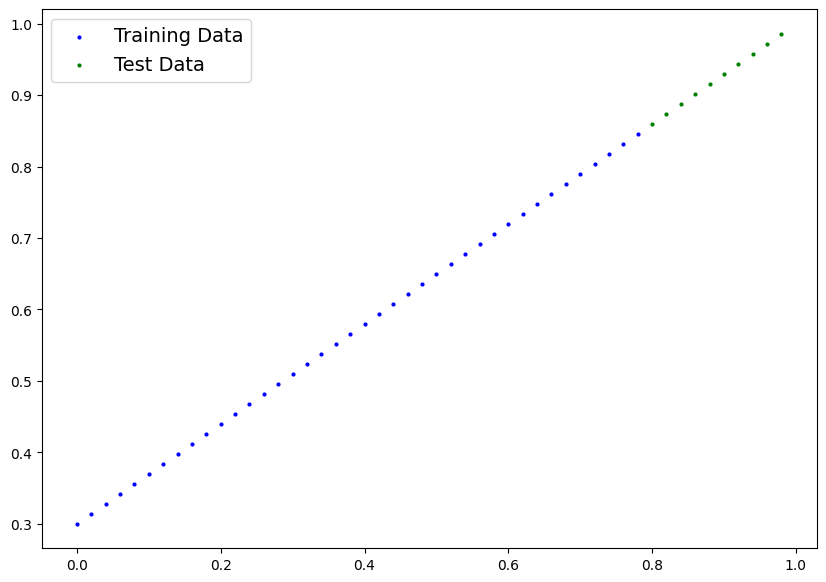

In [27]:
plot_predictions()

In [119]:
#create a Linear Regression Model class
class Linear_Regression(nn.Module):
  #nn modules is the base class for all neural modules(almost everything in PyTorch inherits from nn.Module)
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

# forward method is used to computations of model
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


### PyTorch Model Building Essentials

* torch.nn - contains all of the building blocks for computational graph(a neural network is also a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn , often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules ,if you subclass it , you should overwrite forward()
* torch.optim - this is where optimizers in PyTorch live, they will help with gradient descent


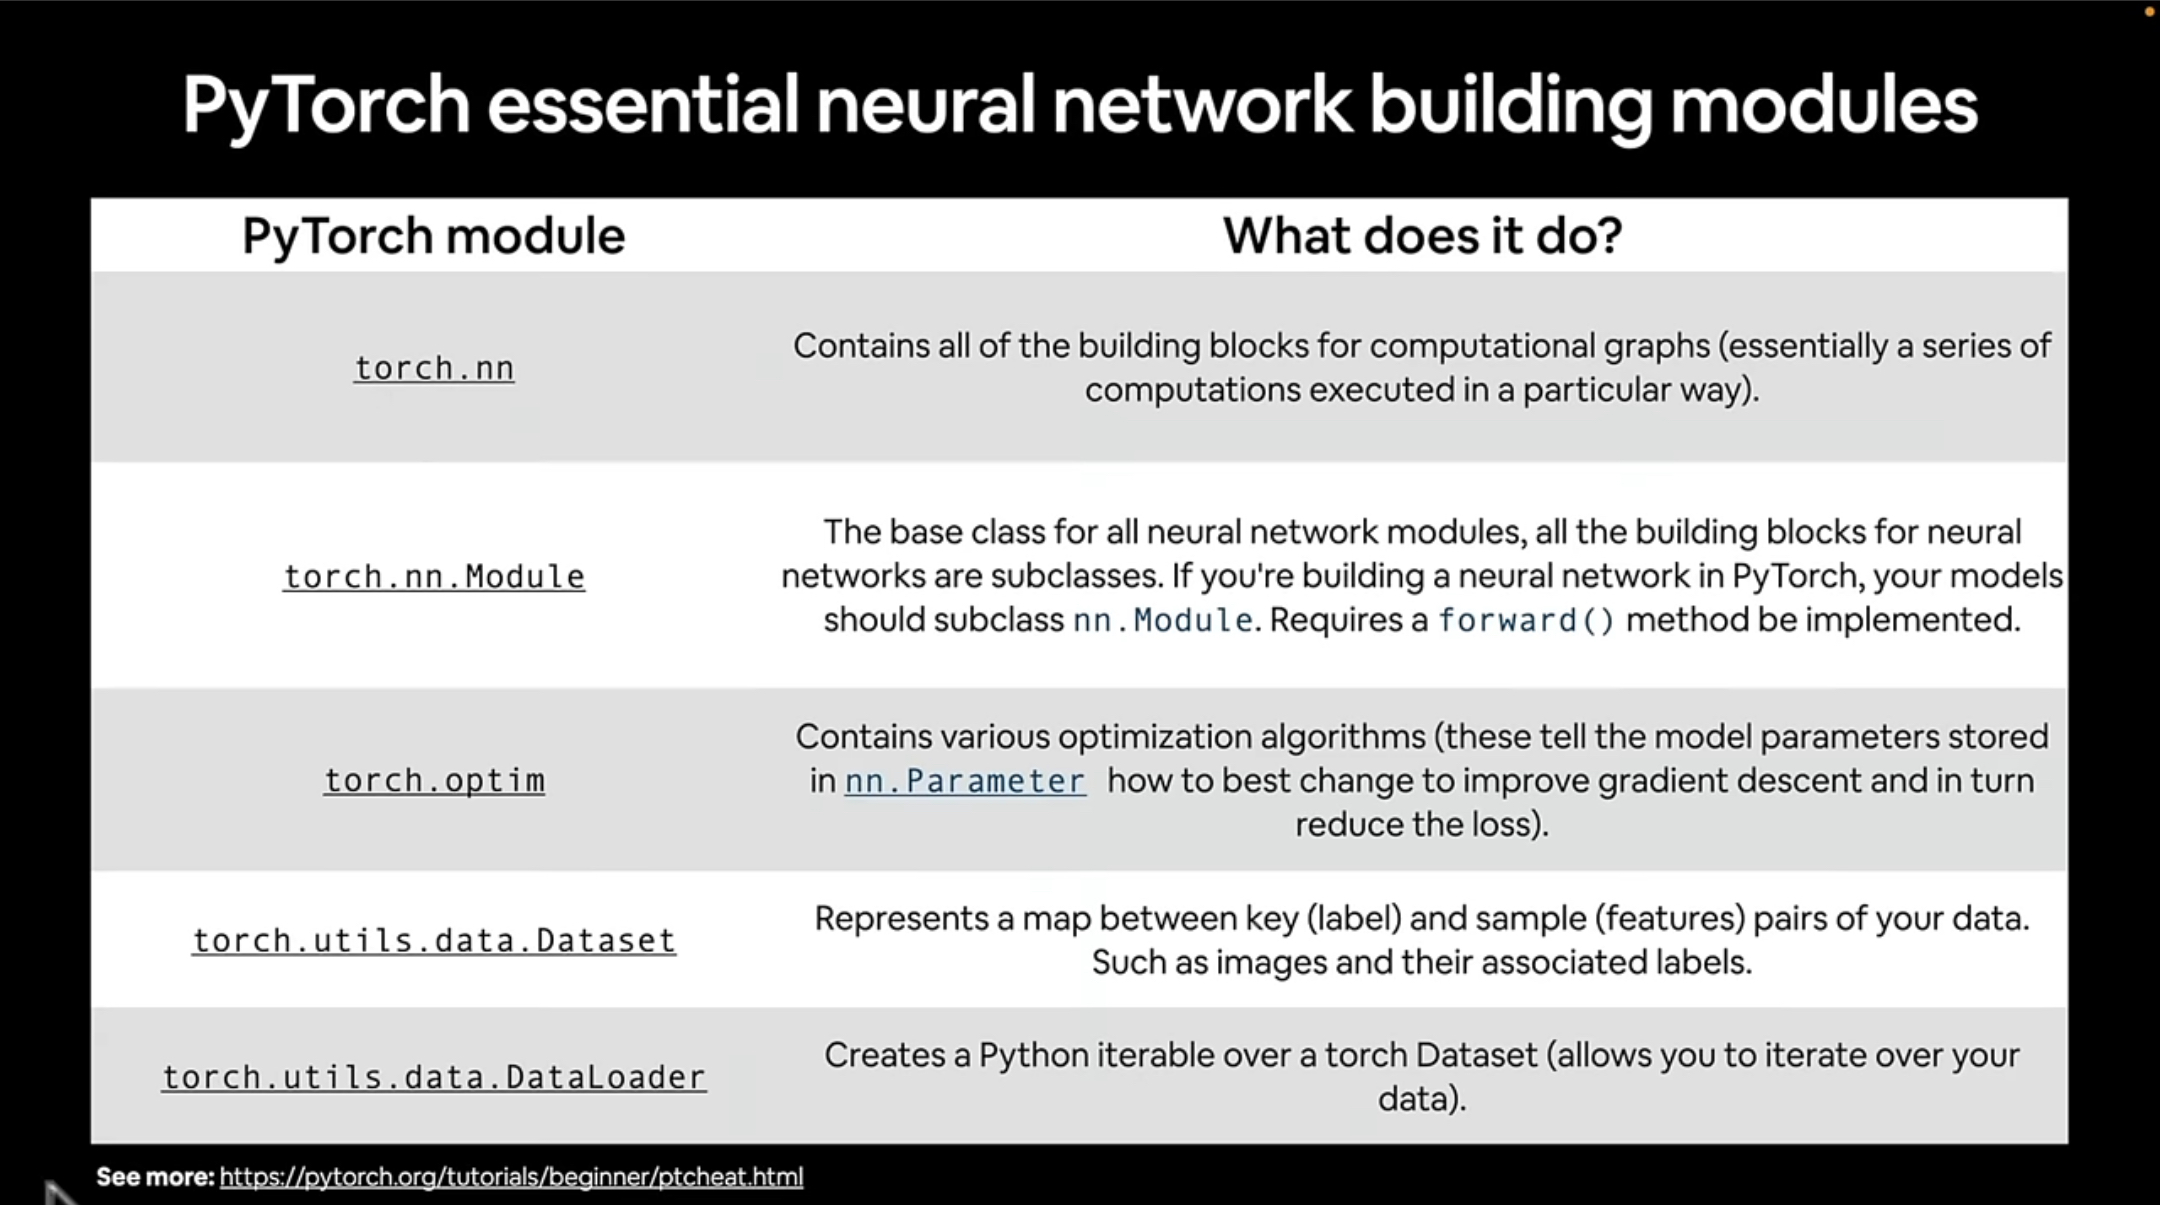

In [120]:
torch.manual_seed(42)

model = Linear_Regression()
model

Linear_Regression()

In [121]:
#listing our parameters and their values
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using torch.inference_mode()

* To check our model's predicitve power, let's see how well it predicts y_test based on x_test .

When we pass data through our model, its going to run it through the forward method()

In [122]:
#making predicions
with torch.inference_mode():
  y_preds = model(X_test)

In [123]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [124]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

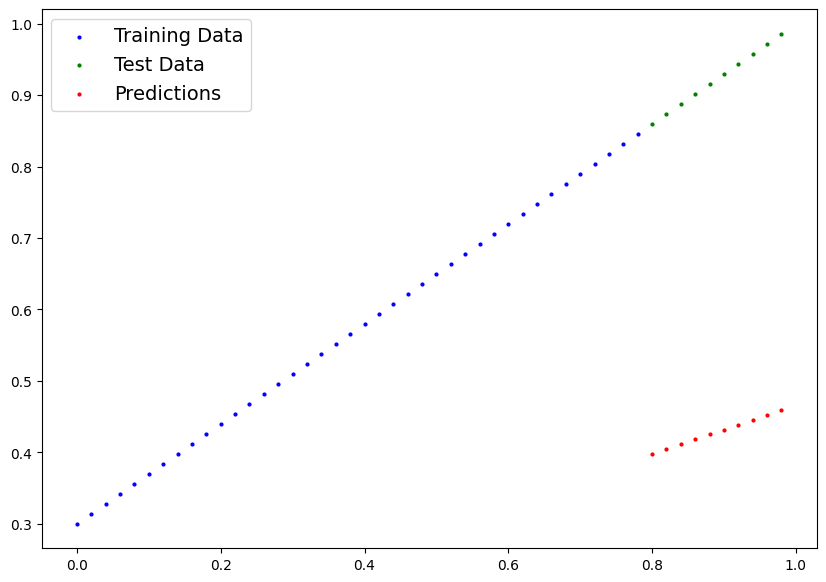

In [125]:
plot_predictions(predictions = y_preds)

## Train a Model

The whole idea of training a model is for a model to move from some unknown parameters(these may be random) to some known parameters

One way to measure how poor our model is performing is to keep a Loss Function

* Note => Loss Function may also be called a Cost function

Things we need to train:


* **Loss Function** A function to measure how wrong our model's predictions are to the ideal

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters
  * Inside an optimizer we need to set two parameters:
     * params - the model parameters we need to optimise(eg.params= model.parameters() )
     * lr(learning rate) - this is a hyperparameter..it defines how big/small the change will be in parameter in an optimizer

And specifically for PyTorch , we need:
* a training loop
* a testing loop

In [126]:
#Setting up a Loss Function

loss_fn = nn.L1Loss()
 #L1 Loss, also called Mean Absolute Error (MAE).

# Setup an optimizer
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)

### Building a training loop and a testing loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward(**backpropagation**)
5. Optimizer step(**Gradient Descent**)

In [127]:
print(torch.cuda.is_available())

False


In [128]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [129]:
torch.cuda.device_count()

0

##Training Loop
Step-0  Loop through the data<br>
Step-1 Forward Pass to make predictions on data<br>
Step-2 Calculate the loss<br>
Step-3 Optimizer Zero grad<br>
Step-4 Loss Backward(Back Propagation)<br>
Step-5 use the optimizer to adjust our models parameters to try to improve the loss(Gradient Descent)<br>



In [130]:
epochs = 200

#setting up empty lists for plotting

epoch_count =[]
train_loss_values = []
test_loss_values = []

#loop

for epoch in range(epochs):
  #set the model to training mode
  model.train()

  #forward pass
  y_pred = model(X_train)
  #loss calculations
  loss = loss_fn(y_pred, y_train)


  #optimizer zero grad(by default it gets accumulated thats why zero the gradients of optimizer)
  optimizer.zero_grad()
  #backprop
  loss.backward()
  #step the optimizer(gradient descent)
  optimizer.step()

  #testing
  model.eval() #turns off different settings in the model which are not needed for evaluation
  with torch.inference_mode(): # turns off the gradient tracking

  #1. Do the forward pass
    test_pred = model(X_test)
  #2. Calculate the loss
    test_loss = loss_fn(test_pred , y_test)


  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss : {loss} | Test loss: {test_loss}")






Epoch: 0 | Loss : 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss : 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss : 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss : 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss : 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss : 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss : 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss : 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss : 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss : 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Loss : 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Loss : 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Loss : 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Loss : 0.014155393466353416 | Test loss: 0.032332

In [131]:
model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [132]:
weight , bias


(0.7, 0.3)

In [133]:
model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [134]:
with torch.inference_mode():
  y_preds_new = model(X_test)



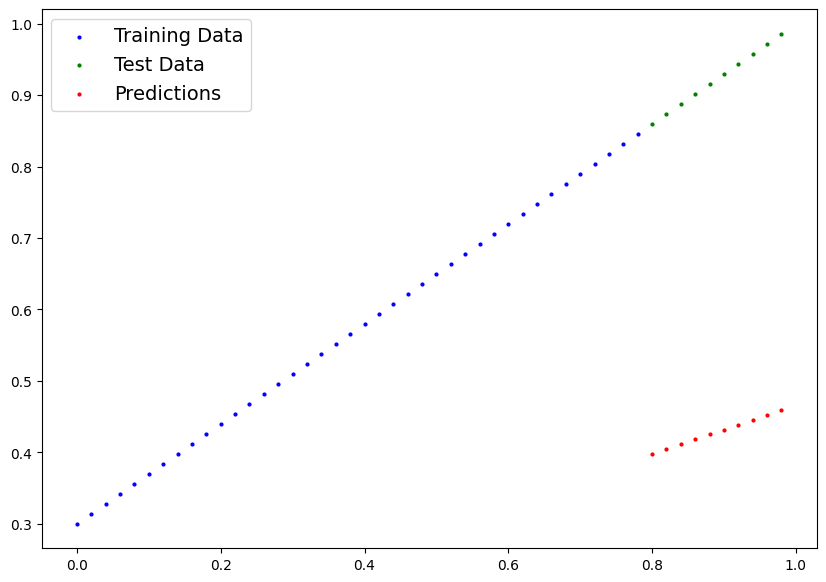

In [135]:
plot_predictions(predictions = y_preds);


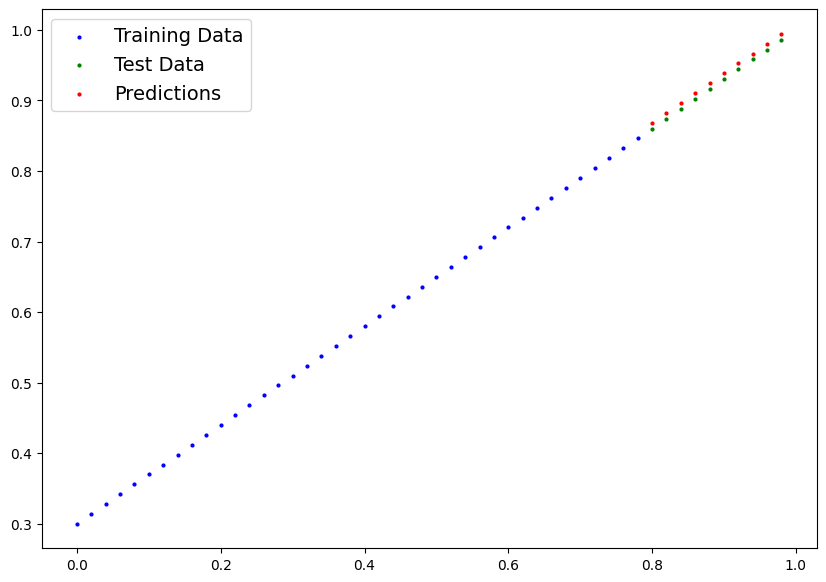

In [136]:
plot_predictions(predictions = y_preds_new);


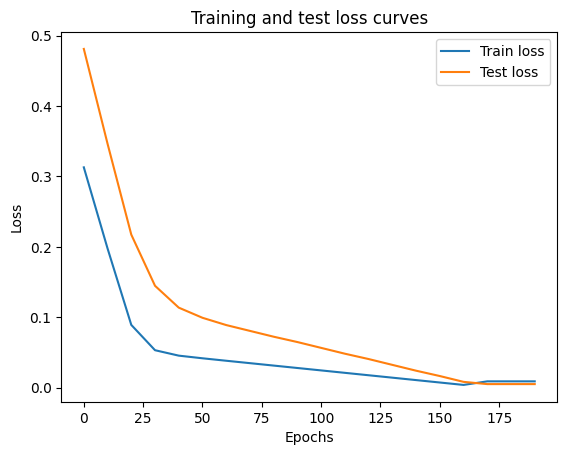

In [137]:
#Plotting the loss curves

plt.plot(epoch_count , np.array(torch.tensor(train_loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count , test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

## Saving a Model in PyTorch

1. torch.save() - saves in Python's Pickle format
2. torch.load() - allows to load a saved PyTorch object
3. torch.nn.Module.load_state_dict() - allows to load a model's saved state. dicitionary



In [141]:
#Saving our PyTorch Model

from pathlib  import Path

#create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok =True)

#create model saved path

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f = MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workflow_model_0.pth


#Loading our saved model



In [146]:
# for loading a saved state_dict we have to instantiate a new instance of our model class

loaded_model_0 = Linear_Regression()

#load the saved state_dict of model_0

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [147]:
model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [148]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [149]:
#paremeters match!!!!! We have loaded our saved model
